# Demo for the Simulation-CurveFitting Strategy 
Subsample type: Poisson subsampling (random subset size)

Key params: 
- subsampling ratio for each individual (example) $q \in [0,1.0]$: a sequence of pre-defined real numbers; 
- noise multiplier `sigma`: the normalized noise level $\varepsilon$, i.e., std of Gaussian noise divided by global L2-norm sensitivity C;
- `delta`: the target DP parameter $\delta$.

## Test #1: computing samping ratios given the privacy budgets for the case of DPSGD

In [1]:
import sys
while '../..' in sys.path:
    sys.path.remove('../..')
while '..' in sys.path:
    sys.path.remove('..')
sys.path.insert(0,'../..')
print(sys.path)

from system.dpcore.analysis.privcost_utils import MultiLevels, Gauss, MixGauss, Pareto, BOUNDED_BUDGET_FUNC
from system.dpcore.analysis.privcost_utils import PrivCostEstimator, PrivCostAnalyser

target_delta = 1e-5
T = 600 # local training iterations
sigma = 10.0 # noise_multiplier * l2_norm_clip, the larger sigma, the more noise added

TARGET_EPSILONS = {
    "TwoLevels": lambda n: MultiLevels(2, [0.8,0.2], [0.5, 5.0], n),
    "ThreeLevels": lambda n: MultiLevels(3, [0.5,0.3,0.2], [0.5, 2.0, 5.0], n),
#     "BoundedGauss": lambda n: Gauss((1.0, 0.2), n),
    "BoundedMixGauss": lambda n: MixGauss([0.5,0.3,0.2], [(0.5, 0.1), (2.0, 0.5), (5.0, 1.0)], n),
    "BoundedPareto": lambda n: Pareto(6, 0.1, 5.0,n)
}

PDP_FUNC = TARGET_EPSILONS["BoundedMixGauss"]
MINIMUM, MAXIMUM = 0.1, 10.0
gen_bounded_priv_bgts_func = lambda n: [min(max(x, MINIMUM), MAXIMUM) for x in PDP_FUNC(n)]
priv_bgt = gen_bounded_priv_bgts_func(60000)

# xdata: priv_bgt, ydata: estimated_sampling_ratios
privCostEstimate = PrivCostEstimator(
    sigma = sigma, # priv_bgt_curve 仅与sigma有关，而utility则与l2-norm clip的大小有关 
    inner_iters = T, 
    outer_iters = 0, 
    outer_ratio = 1.0,
    delta = target_delta)


['../..', '/data/privacyGroup/liujunxu/PFL_PDP/baselines/pers_priv_illustrate', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python37.zip', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/lib-dynload', '', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/IPython/extensions', '/home/wamdm/.ipython']


In [2]:
privCostCurve = privCostEstimate.estimator(est_object="probs")


maximum budget: 14.756462732485115 minimum budget: 0.015233638906637247
[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024
 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036
 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06
 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072
 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084
 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096
 0.097 0.098 0.099 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18
 0.19  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3
 0.31  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42
 0.43  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54
 0.55  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0.6

/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/rdp_acct.py:730: RuntimeWarning: divide by zero encountered in log
  + (alpha+1-jvec[0:alpha-1])*np.log(1-prob))
/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/utils.py:8: RuntimeWarning: invalid value encountered in subtract
  return a+np.log(np.sum(np.exp(x-a)))
/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/rdp_acct.py:731: RuntimeWarning: divide by zero encountered in log
  results[alpha-1] = utils.stable_logsumexp_two((alpha-1)*np.log(1-prob)


In [3]:
sample_ratios = [float(privCostCurve(eps)) for eps in priv_bgt]
sample_ratios

[0.1421508030463606,
 0.038141329245768775,
 0.16009914938770195,
 0.16647365944539627,
 0.03970999838391897,
 0.0773046097083059,
 0.04218121456763624,
 0.04294480844604158,
 0.5041930262131707,
 0.02381833136081211,
 0.5296603354726279,
 0.14078663073450812,
 0.031933686801933994,
 0.20974943682475372,
 0.03993757463669777,
 0.04790388578503421,
 0.3191413262361183,
 0.04328933041852669,
 0.0539741934117134,
 0.18205126908898298,
 0.05157058201421723,
 0.20395037276451033,
 0.14317340239119958,
 0.08325257756084936,
 0.1162114669056536,
 0.3844841799367474,
 0.37015902942558343,
 0.14761364937252644,
 0.5085407658250818,
 0.037067960245531294,
 0.04784276534578764,
 0.4240307936252824,
 0.4365276103414886,
 0.1728167569900406,
 0.34918369405839794,
 0.26824982821576393,
 0.35236327497753406,
 0.1391462693064646,
 0.04329958723738277,
 0.29840330642681123,
 0.0328408815949681,
 0.04497830948861688,
 0.05506277188439949,
 0.0156824822463153,
 0.054748324010574695,
 0.12918086311106294,

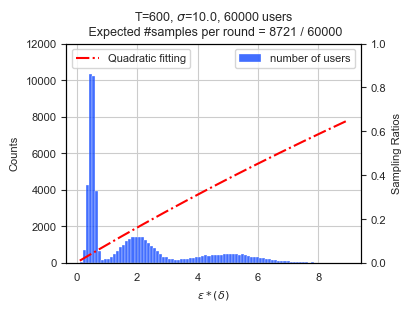

In [4]:
# Vision
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.close('all')
plt.rcParams['font.sans-serif'] = ['SimSun']
legend_font = {
    'style': 'normal',
    'size': 8,  # 字号
    'weight': "normal",  # 是否加粗，不加粗
}
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #轮廓线
sns.set_palette(palette=sns.color_palette('bright')) #颜色

fig, ax2 = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True)
sns.histplot(x=priv_bgt, ax=ax2, label='number of users')
ax2.set_ylabel(r'Counts', fontsize=8)
ax2.set_xlabel(r'$\epsilon*(\delta)$', fontsize=8)
ax2.tick_params(labelsize=8)
ax2.set_ylim(0, 12000)
ax2.legend(loc='upper right', prop=legend_font)
ax2.grid(True)
# ax2.yaxis.set_major_locator(MultipleLocator(20)) #把y轴的主刻度设置为10的倍数

# subplot 3
# xdata = list(np.arange(0.0, 10.0,1.0))
ax = ax2.twinx()
sns.lineplot(x=priv_bgt, y=sample_ratios, label=f'Quadratic fitting', color='red', linestyle='dashdot', ax=ax)

ax.set_ylabel(r'Sampling Ratios', fontsize=8)
ax.tick_params(labelsize=8)
ax.set_ylim(0, 1)
ax.legend(loc='upper left', prop=legend_font)
ax.grid(False) 

ax.set_title('T={}, $\sigma$={}, {} users\n Expected #samples per round = {} / {}'.format(T,sigma,60000, int(sum(sample_ratios)), len(priv_bgt)), fontsize=9)

# fig.suptitle('Subsampled Gaussian Mechanism, T={}, $\delta$={}'.format(T, delta), fontsize=10, weight='bold')
# plt.tight_layout()
# plt.legend(loc='upper left', prop=legend_font, handles = [fig1,fig2])
plt.savefig('TestMixGaussBudgetDistAndSamplingRatios.pdf', dpi=500)
plt.show()

## Test #2: test Pareto sampling

['/data/privacyGroup/liujunxu/PFL_PDP/baselines/pers_priv_illustrate', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python37.zip', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/lib-dynload', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/IPython/extensions', '/home/wamdm/.ipython']


/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/rdp_acct.py:730: RuntimeWarning: divide by zero encountered in log
  + (alpha+1-jvec[0:alpha-1])*np.log(1-prob))
/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/utils.py:8: RuntimeWarning: invalid value encountered in subtract
  return a+np.log(np.sum(np.exp(x-a)))
/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/rdp_acct.py:731: RuntimeWarning: divide by zero encountered in log
  results[alpha-1] = utils.stable_logsumexp_two((alpha-1)*np.log(1-prob)


maximum budget: 14.756462732485115 minimum budget: 0.015233638906637247
[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024
 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036
 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06
 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072
 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084
 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096
 0.097 0.098 0.099 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18
 0.19  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3
 0.31  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42
 0.43  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54
 0.55  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0.6

TypeError: unhashable type: 'numpy.ndarray'

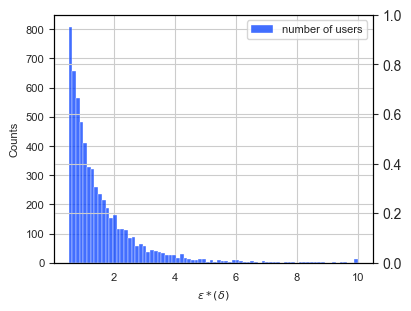

In [5]:
# Vision
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from system.dpcore.analysis.privcost_utils import PrivCostEstimator, PrivCostAnalyser, MultiLevels, Gauss, MixGauss, Pareto, BOUNDED_BUDGET_FUNC

target_delta = 1e-5
T = 600 # local training iterations
sigma = 10.0 # noise_multiplier * l2_norm_clip, the larger sigma, the more noise added

TARGET_EPSILONS = {
    "TwoLevels": lambda n: MultiLevels(2, [0.99,0.01], [0.5, 5.0], n),
    "ThreeLevels": lambda n: MultiLevels(3, [0.90,0.09,0.01], [0.5, 2.0, 5.0], n),
    "BoundedPareto": lambda n: Pareto(6, 0.1, 5.0, n), 
    "BoundedMixGauss": lambda n: MixGauss([0.90,0.09,0.01], [(0.5, 0.1), (2.0, 0.5), (5.0, 1.0)], n),
}

PDP_FUNC = TARGET_EPSILONS["BoundedPareto"]
MINIMUM, MAXIMUM = 0.1, 10.0
gen_bounded_priv_bgts_func = lambda n: [min(max(x, MINIMUM), MAXIMUM) for x in PDP_FUNC(n)]
priv_bgt = gen_bounded_priv_bgts_func(6000)

# xdata: priv_bgt, ydata: estimated_sampling_ratios
privCostCurve = PrivCostEstimator(
    sigma = sigma, # priv_bgt_curve 仅与sigma有关，而utility则与l2-norm clip的大小有关 
    inner_iters = T, 
    outer_iters = 0, 
    outer_ratio = 1.0,
    delta = target_delta).estimator(est_object="probs")
sample_ratios = [privCostCurve(eps) for eps in priv_bgt]

# Result Vision
plt.close('all')
plt.rcParams['font.sans-serif'] = ['SimSun']
legend_font = {
    'style': 'normal',
    'size': 8,  # 字号
    'weight': "normal",  # 是否加粗，不加粗
}
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #轮廓线
sns.set_palette(palette=sns.color_palette('bright')) #颜色

fig, ax2 = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True)
sns.histplot(x=priv_bgt, ax=ax2, label='number of users')
ax2.set_ylabel(r'Counts', fontsize=8)
ax2.set_xlabel(r'$\epsilon*(\delta)$', fontsize=8)
ax2.tick_params(labelsize=8)
# ax2.set_ylim(0, 12000)
ax2.legend(loc='upper right', prop=legend_font)
ax2.grid(True)
# ax2.yaxis.set_major_locator(MultipleLocator(20)) #把y轴的主刻度设置为10的倍数

# subplot 3
ax = ax2.twinx()
sns.lineplot(x=priv_bgt, y=sample_ratios, label=f'Quadratic fitting', color='red', linestyle='dashdot', ax=ax)

ax.set_ylabel(r'Sampling Ratios', fontsize=8)
ax.tick_params(labelsize=8)
ax.set_ylim(0, 1)
ax.legend(loc='upper left', prop=legend_font)
ax.grid(False) 

ax.set_title('T={}, $\sigma$={}, {} users\n Expected #samples per round = {} / {}'.format(T,sigma,60000, int(sum(sample_ratios)), len(priv_bgt)), fontsize=9)

plt.savefig('TestParetoBudgetDistAndSamplingRatios.pdf', dpi=500)
plt.show()

## Test #2: ALL TYPES of budget distribution 

In [6]:
import sys
while '../..' in sys.path:
    sys.path.remove('../..')
while '..' in sys.path:
    sys.path.remove('..')
sys.path.insert(0,'../..')
print(sys.path)

import numpy as np
from system.dpcore.analysis.privcost_utils import PrivCostEstimator, PrivCostAnalyser, MultiLevels, Gauss, MixGauss, Pareto, BOUNDED_BUDGET_FUNC

target_delta = 1e-4
T = 200 # local training iterations
sigma = 5.0 # noise_multiplier * l2_norm_clip, the larger sigma, the more noise added
NUM_USERS = 6000

# TARGET_EPSILONS = {
#     "TwoLevels": lambda n: MultiLevels(2, [0.8,0.2], [0.5, 5.0], n),
#     "ThreeLevels": lambda n: MultiLevels(3, [0.5,0.3,0.2], [0.5, 2.0, 5.0], n),
# #     "BoundedGauss": lambda n: Gauss((1.0, 0.2), n),
#     "BoundedPareto": lambda n: Pareto(6, 0.1, 5.0,n),
#     "BoundedMixGauss": lambda n: MixGauss([0.5,0.3,0.2], [(0.5, 0.1), (2.0, 0.5), (5.0, 1.0)], n),
# }

# TARGET_EPSILONS = {
#     "TwoLevels": lambda n: MultiLevels(2, [0.9,0.1], [1.0, 10.0], n),
#     "ThreeLevels": lambda n: MultiLevels(3, [0.7,0.2,0.1], [1.0, 3.0, 10.0], n),
#     "BoundedPareto": lambda n: Pareto(10, 0.1, 5.0, n), 
#     "BoundedMixGauss": lambda n: MixGauss([0.7,0.2,0.1], [(1.0, 0.1), (3.0, 0.5), (8.0, 1.0)], n),
# }

# TARGET_EPSILONS = {
#     "TwoLevels": lambda n: MultiLevels(2, [0.9,0.1], [0.5, 10.0], n),
#     "ThreeLevels": lambda n: MultiLevels(3, [0.8,0.1,0.1], [0.5, 2.0, 10.0], n),
# #     "BoundedGauss": lambda n: Gauss((1.0, 0.2), n),
#     "BoundedPareto": lambda n: Pareto(6, 0.1, 5.0, n), 
#     "BoundedMixGauss": lambda n: MixGauss([0.8,0.1,0.1], [(0.5, 0.1), (2.0, 0.5), (8.0, 1.0)], n),
# }

# matchfl
TARGET_EPSILONS = {
    "TwoLevels": lambda n: MultiLevels(2, [0.8,0.2], [0.5, 5.0], n),
    "ThreeLevels": lambda n: MultiLevels(3, [0.7,0.2,0.1], [0.5, 2.0, 5.0], n),
    "BoundedPareto": lambda n: Pareto(2.5, 0.01, 5.0, n), 
    "BoundedMixGauss": lambda n: MixGauss([0.7,0.2,0.1], [(0.5, 0.1), (2.0, 0.5), (5.0, 1.0)], n),
}

MINIMUM, MAXIMUM = 0.1, 10.0
priv_bgt_list, sample_ratios_list = [], []
privCostCurve = PrivCostEstimator(
    sigma = sigma, # priv_bgt_curve 仅与sigma有关，而utility则与l2-norm clip的大小有关 
    inner_iters = T, 
    outer_iters = 0, 
    outer_ratio = 1.0,
    delta = target_delta).estimator(est_object="probs") # 输出是一个复合函数
    
for CHOICE in TARGET_EPSILONS.keys():
    print(CHOICE)
    PDP_FUNC = TARGET_EPSILONS[CHOICE]
    gen_bounded_priv_bgts_func = lambda n: np.array([min(max(x, MINIMUM), MAXIMUM) for x in PDP_FUNC(n)])
    priv_bgt = gen_bounded_priv_bgts_func(NUM_USERS)
    priv_bgt_list.append(priv_bgt)
    
    sample_ratios = np.array([float(privCostCurve(eps)) for eps in priv_bgt])
    sample_ratios_list.append(sample_ratios)

['../..', '/data/privacyGroup/liujunxu/PFL_PDP/baselines/pers_priv_illustrate', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python37.zip', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/lib-dynload', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages', '/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/IPython/extensions', '/home/wamdm/.ipython']


/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/rdp_acct.py:730: RuntimeWarning: divide by zero encountered in log
  + (alpha+1-jvec[0:alpha-1])*np.log(1-prob))
/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/utils.py:8: RuntimeWarning: invalid value encountered in subtract
  return a+np.log(np.sum(np.exp(x-a)))
/home/wamdm/miniconda3/envs/liujunxu_tf1/lib/python3.7/site-packages/autodp/rdp_acct.py:731: RuntimeWarning: divide by zero encountered in log
  results[alpha-1] = utils.stable_logsumexp_two((alpha-1)*np.log(1-prob)


maximum budget: 16.605170185988094 minimum budget: 0.028806452433143885
[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024
 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036
 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06
 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072
 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084
 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096
 0.097 0.098 0.099 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18
 0.19  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3
 0.31  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42
 0.43  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54
 0.55  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0.6

In [7]:
from torch.utils.data import Subset
for i, sampling_probs in enumerate(sample_ratios_list):
    print('expected: ', int(sum(sampling_probs)))
    print('strong', int(min(sampling_probs) * len(sampling_probs)))
    print('weak', int(max(sampling_probs) * len(sampling_probs)))
    print(min(sampling_probs), max(sampling_probs))
    valid_indices = np.where(priv_bgt_list[i] > 1.0)[0]
    valid_sampling_probs = sampling_probs[valid_indices]
    print('dropout', int(min(valid_sampling_probs)*len(valid_sampling_probs)))

expected:  617
strong 233
weak 2153
0.03888027704549117 0.3589938852555001
dropout 430
expected:  560
strong 233
weak 2153
0.03888027704549117 0.3589938852555001
dropout 272
expected:  1171
strong 46
weak 3983
0.007824599548023602 0.6639749988639773
dropout 295
expected:  550
strong 62
weak 3187
0.010382985164339716 0.5311773212669545
dropout 131


2


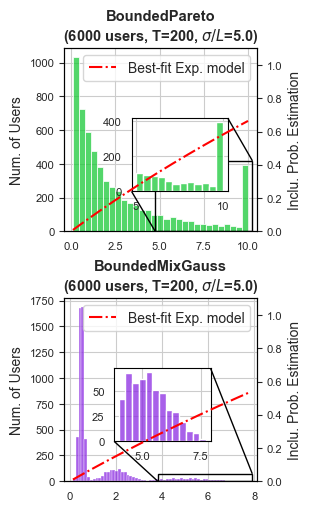

In [21]:
# Vision
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.close('all')
plt.rcParams['font.sans-serif'] = ['SimSun']

legend_font = {
    'family': 'sans-serif',  # 字体
    'style': 'normal',
    'size': 10,  # 字号
    'weight': "normal",  # 是否加粗，不加粗
}
label_font = {
    'family':'sans-serif',
    'size': 10,  # 字号
}
title_font = {
    'family':'sans-serif',
    'size': 10.5,  # 字号
    'weight': "bold",  # 是否加粗，不加粗
}

sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #轮廓线
sns.set_palette(palette=sns.color_palette('bright')) #颜色

ALL_TYPES = list(TARGET_EPSILONS.keys())

fig, ((ax3), (ax4)) = plt.subplots(2, 1, figsize=(3, 5), constrained_layout=True)
all_axes = plt.gcf().get_axes()
print(len(all_axes))

# subplot 3
sns.histplot(x=priv_bgt_list[2], ax=ax3, label=None, color=sns.color_palette()[2])
ax3.set_ylabel(r'Num. of Users', **label_font)
ax3.tick_params(labelsize=8)
# ax3.set_ylim(0,800)
# all_axes[2].yaxis.set_major_locator(MultipleLocator(50)) #把y轴的主刻度设置为10的倍数
# ax3.legend(loc='upper right', prop=legend_font)
ax3.grid(True)

# ===============
# 嵌入绘制局部放大图的坐标系
ax3in = inset_axes(ax3, width='50%', height='40%', loc='lower center', 
                   bbox_to_anchor=(0.1,0.18,1,1), bbox_transform=ax3.transAxes)
sub_temp = sns.histplot(x=priv_bgt_list[2][priv_bgt_list[2] > 5.0], 
                        ax=ax3in,
                        color=sns.color_palette()[2])
# ax3in.set_ylim(0,100)
ax3in.tick_params(labelsize=8)
mark_inset(ax3, ax3in, loc1=1, loc2=3, fc="none", ec='k', lw=1)
ax3in.set_ylabel(None, **label_font)
# ===============

ax31 = ax3.twinx()
sns.lineplot(x=priv_bgt_list[2], y=sample_ratios_list[2], label=f'Best-fit Exp. model', color='red', linestyle='dashdot', ax=ax31)
ax31.set_xlabel(r'$\varepsilon*(\delta)$', **label_font)
ax31.set_ylabel(r'Inclu. Prob. Estimation', **label_font)
ax31.tick_params(labelsize=8)
ax31.set_ylim(0, 1.1)
ax31.legend(loc='upper right', prop=legend_font)
ax31.grid(False) 



ax3.set_title("{}\n({} users, T={}, $\sigma/L$={})".format(ALL_TYPES[2], NUM_USERS, T, sigma), **title_font)

# subplot 4
sns.histplot(x=priv_bgt_list[3], ax=ax4, color=sns.color_palette()[4])
ax4.set_ylabel(r'Num. of Users', **label_font)
ax4.tick_params(labelsize=8)
# ax4.set_ylim(0, 2500)
# ax4.legend(loc='upper right', prop=legend_font)
ax4.grid(True)

# ===============
# 嵌入绘制局部放大图的坐标系
ax4in = inset_axes(ax4, width='50%', height='40%', loc='lower center', 
                   bbox_to_anchor=(0.01,0.18,1,1), 
                   bbox_transform=ax4.transAxes)
sub_temp = sns.histplot(x=priv_bgt_list[3][priv_bgt_list[3] > 4.0], 
                        ax=ax4in,
                        color=sns.color_palette()[4])
# ax4in.set_ylim(0, 30)
ax4in.tick_params(labelsize=8)
mark_inset(ax4, ax4in, loc1=1, loc2=3, fc="none", ec='k', lw=1)
ax4in.set_ylabel(None, **label_font)
# ===============


ax41 = ax4.twinx()
sns.lineplot(x=priv_bgt_list[3], y=sample_ratios_list[3], label=f'Best-fit Exp. model', 
             color='red', linestyle='dashdot', ax=ax41)
ax41.set_xlabel(r'$\varepsilon*(\delta)$', **label_font)
ax41.set_ylabel(r'Inclu. Prob. Estimation', **label_font)
ax41.tick_params(labelsize=8)
ax41.set_ylim(0, 1.1)
ax41.legend(loc='upper right', prop=legend_font)
ax41.grid(False) 


ax4.set_title("{}\n({} users, T={}, $\sigma/L$={})".format(ALL_TYPES[3], NUM_USERS, T, sigma), **title_font)

# fig.suptitle('Subsampled Gaussian Mechanism, T={}, $\delta$={}'.format(T, delta), fontsize=10)
plt.savefig('TestALLBudgetDistAndSamplingRatios_pdpsgd_part.pdf', dpi=500)
plt.show()

In [ ]:
# Vision
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.close('all')
plt.rcParams['font.sans-serif'] = ['SimSun']

legend_font = {
    'family': 'sans-serif',  # 字体
    'style': 'normal',
    'size': 10,  # 字号
    'weight': "normal",  # 是否加粗，不加粗
}
label_font = {
    'family':'sans-serif',
    'size': 10,  # 字号
}
title_font = {
    'family':'sans-serif',
    'size': 10.5,  # 字号
    'weight': "bold",  # 是否加粗，不加粗
}

sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #轮廓线
sns.set_palette(palette=sns.color_palette('bright')) #颜色

ALL_TYPES = list(TARGET_EPSILONS.keys())

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)
all_axes = plt.gcf().get_axes()
print(len(all_axes))
# subplot 1
sns.histplot(x=priv_bgt_list[0], ax=ax1, color=sns.color_palette()[0])
ax1.set_ylabel(r'Num. of Users', **label_font)
ax1.tick_params(labelsize=8)
ax1.set_ylim(0, 6000)
# ax1.legend(loc='upper right', prop=legend_font)
ax1.grid(True)

ax11 = ax1.twinx()
sns.lineplot(x=priv_bgt_list[0], y=sample_ratios_list[0], label='Best-fit Exp. model', color='red', linestyle='dashdot', ax=ax11)
ax11.set_xlabel(r'$\epsilon*(\delta)$', **label_font)
# ax11.set_ylabel(r'Sampling Ratios', **label_font)
ax11.tick_params(labelsize=8)
ax11.set_ylim(0, 1.1)
ax11.legend(loc='upper right', prop=legend_font)
ax11.grid(False) 
ax1.set_title("{}\n({} users, T={}, $\sigma/L$={})".format(ALL_TYPES[0], NUM_USERS, T, sigma), **title_font)

# subplot 2
sns.histplot(x=priv_bgt_list[1], ax=ax2, label='number of users', color=sns.color_palette()[1])
ax2.set_ylabel(None, **label_font)
ax2.tick_params(labelsize=8)
# ax2.legend(loc='upper right', prop=legend_font)
ax2.grid(True)
ax2.set_ylim(0,5000)
# all_axes[2].yaxis.set_major_locator(MultipleLocator(50)) #把y轴的主刻度设置为10的倍数

ax21 = ax2.twinx()
sns.lineplot(x=priv_bgt_list[1], y=sample_ratios_list[1], label=f'Best-fit Exp. model', color='red', linestyle='dashdot', ax=ax21)
ax21.set_xlabel(r'$\epsilon*(\delta)$', **label_font)
ax21.set_ylabel(r'Inclu. Prob. $\pi$', **label_font)
ax21.tick_params(labelsize=8)
ax21.set_ylim(0, 1.1)
ax21.legend(loc='upper right', prop=legend_font)
ax21.grid(False) 
ax2.set_title("{}\n({} users, T={}, $\sigma/L$={})".format(ALL_TYPES[1], NUM_USERS, T, sigma), **title_font)

# subplot 3
sns.histplot(x=priv_bgt_list[2], ax=ax3, label=None, color=sns.color_palette()[2])
ax3.set_ylabel(r'Num. of Users', **label_font)
ax3.tick_params(labelsize=8)
ax3.set_ylim(0,800)
# all_axes[2].yaxis.set_major_locator(MultipleLocator(50)) #把y轴的主刻度设置为10的倍数
# ax3.legend(loc='upper right', prop=legend_font)
ax3.grid(True)
ax31 = ax3.twinx()
sns.lineplot(x=priv_bgt_list[2], y=sample_ratios_list[2], label=f'Best-fit Exp. model', color='red', linestyle='dashdot', ax=ax31)

# ===============
# 嵌入绘制局部放大图的坐标系
ax3in = inset_axes(ax3, width='50%', height='40%', loc='lower center', 
                   bbox_to_anchor=(0.1,0.18,1,1), bbox_transform=ax3.transAxes)
sub_temp = sns.histplot(x=priv_bgt_list[2][priv_bgt_list[2] > 3.0], 
                        ax=ax3in,
                        color=sns.color_palette()[2])
# ax3in.set_ylim(0,100)
ax3in.tick_params(labelsize=8)
mark_inset(ax3, ax3in, loc1=1, loc2=3, fc="none", ec='k', lw=1)
ax3in.set_ylabel(r'Num. of Users', **label_font)
# ===============

ax31.set_xlabel(r'$\varepsilon*(\delta)$', **label_font)
# ax31.set_ylabel(r'Sampling Ratios', **label_font)
ax31.tick_params(labelsize=8)
ax31.set_ylim(0, 1.1)
ax31.legend(loc='upper right', prop=legend_font)
ax31.grid(False) 
ax3.set_title("{}\n({} users, T={}, $\sigma/L$={})".format(ALL_TYPES[2], NUM_USERS, T, sigma), **title_font)

# subplot 4
sns.histplot(x=priv_bgt_list[3], ax=ax4, color=sns.color_palette()[4])
ax4.set_ylabel(None, **label_font)
ax4.tick_params(labelsize=8)
ax4.set_ylim(0, 2500)
# ax4.legend(loc='upper right', prop=legend_font)
ax4.grid(True)

ax41 = ax4.twinx()
sns.lineplot(x=priv_bgt_list[3], y=sample_ratios_list[3], label=f'Best-fit Exp. model', 
             color='red', linestyle='dashdot', ax=ax41)

# ===============
# 嵌入绘制局部放大图的坐标系
ax4in = inset_axes(ax4, width='50%', height='40%', loc='lower center', 
                   bbox_to_anchor=(0.01,0.18,1,1), 
                   bbox_transform=ax4.transAxes)
sub_temp = sns.histplot(x=priv_bgt_list[3][priv_bgt_list[3] > 4.0], 
                        ax=ax4in,
                        color=sns.color_palette()[4])
# ax4in.set_ylim(0, 30)
ax4in.tick_params(labelsize=8)
mark_inset(ax4, ax4in, loc1=1, loc2=3, fc="none", ec='k', lw=1)
ax4in.set_ylabel(r'Num. of Users', **label_font)
# ===============

ax41.set_xlabel(r'$\varepsilon*(\delta)$', **label_font)
ax41.set_ylabel(r'Sampling Ratios', **label_font)
ax41.tick_params(labelsize=8)
ax41.set_ylim(0, 1.1)
ax41.legend(loc='upper right', prop=legend_font)
ax41.grid(False) 
ax4.set_title("{}\n({} users, T={}, $\sigma/L$={})".format(ALL_TYPES[3], NUM_USERS, T, sigma), **title_font)

# fig.suptitle('Subsampled Gaussian Mechanism, T={}, $\delta$={}'.format(T, delta), fontsize=10)
plt.savefig('TestALLBudgetDistAndSamplingRatios_pdpsgd.pdf', dpi=500)
plt.show()